# TimeSeriesAnalysis-ARIMA
This project is aimed at doing time series forecast using AutoRegressive Integrated Moving Average, ARIMA. The dataset used is the air passenger dataset.

In [33]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.stattools import adfuller

%matplotlib inline

In [27]:
# load data
data = pd.read_csv('AirPassengers.csv')


In [13]:
# data exploration - visualization and wrangling
print(data.shape)
data

(144, 2)


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


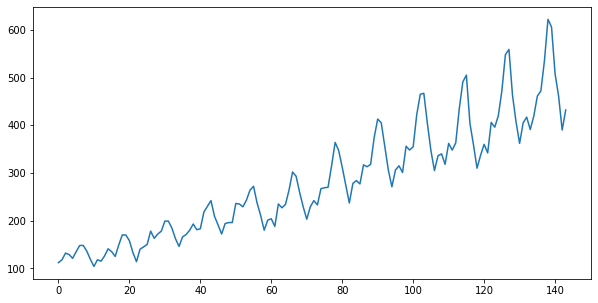

In [14]:
# visualise the time series
plt.figure(figsize=(10,5))
#import rcParams
#from matplotlib.pyplot import rcParams
#rcParamsParams['figure.figsize'] = 10, 5
plt.plot(data['#Passengers'])

In [15]:
data.Month[1]

'1949-02'

In [19]:
#data1 = pd.Series(data['#Passengers'], index=pd.date_range('1949/01/01', '1960/12/01', 144))
#data1
#len(data1)

1949-01-01 00:00:00.000000000   NaN
1949-01-31 10:24:20.139860140   NaN
1949-03-02 20:48:40.279720280   NaN
1949-04-02 07:13:00.419580420   NaN
1949-05-02 17:37:20.559440560   NaN
                                 ..
1960-08-01 06:22:39.440559488   NaN
1960-08-31 16:46:59.580419584   NaN
1960-10-01 03:11:19.720279744   NaN
1960-10-31 13:35:39.860139904   NaN
1960-12-01 00:00:00.000000000   NaN
Name: #Passengers, Length: 144, dtype: float64

         #Passengers
Month               
1949-01          112
1949-02          118
1949-03          132
1949-04          129
1949-05          121


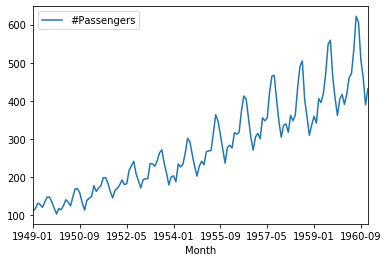

In [28]:
# setting month column as index
data1 = data.set_index('Month')
print(data1.head())
data1.plot()

In [29]:
# parsing the date strings into datetime format i.e., date becomes the index
data['Month'] = pd.to_datetime(data.Month, infer_datetime_format=True)
print(data.head())

# set months as the index
data = data.set_index('Month')
data

       Month  #Passengers
0 1949-01-01          112
1 1949-02-01          118
2 1949-03-01          132
3 1949-04-01          129
4 1949-05-01          121


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [17]:
data.shape

(144, 1)

In [4]:
# renaming the column
#data.columns = ['passengers']
data = data.rename(columns={'#Passengers' : 'passengers'})
data.head()

,passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Text(0, 0.5, 'Number of air passengers')

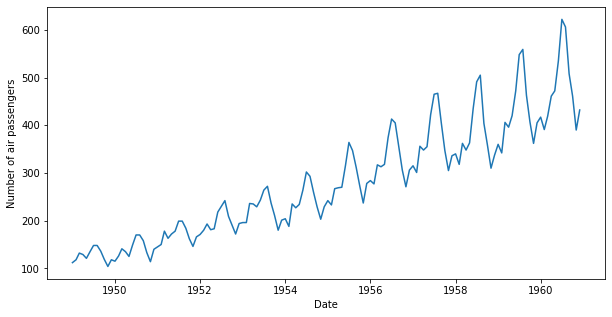

In [20]:
# plot the wrangled data
plt.figure(figsize=(10,5))
plt.plot(data)
plt.xlabel('Date')
plt.ylabel('Number of air passengers')

Shows trend!

## Testing for stationarity

In [32]:
print(data)
data.rolling(window=12).mean()

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
...                 ...
1960-08-01          606
1960-09-01          508
1960-10-01          461
1960-11-01          390
1960-12-01          432

[144 rows x 1 columns]


,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,463.333333
1960-09-01,467.083333
1960-10-01,471.583333


In [5]:
# Calculating the rolling statistics
rolMean = data.rolling(window=12).mean()
rolStd = data.rolling(window=12).std()
print(rolMean)
print(rolStd)

            passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01  463.333333
1960-09-01  467.083333
1960-10-01  471.583333
1960-11-01  473.916667
1960-12-01  476.166667

[144 rows x 1 columns]
            passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01   83.630500
1960-09-01   84.617276
1960-10-01   82.541954
1960-11-01   79.502382
1960-12-01   77.737125

[144 rows x 1 columns]


Text(0.5, 1.0, 'Rolling mean and standard deviation')

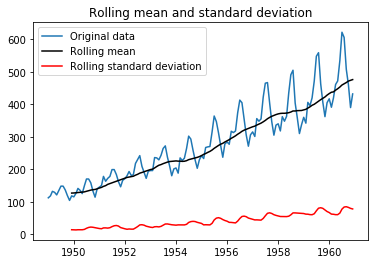

In [38]:
# Plot the rolling statistics for data
data_plot = plt.plot(data, label='Original data')
rolMean_plot = plt.plot(rolMean,color='black', label='Rolling mean')
rolStd_plot = plt.plot(rolStd,color='red', label='Rolling standard deviation')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation')


The plot above shows the data is not stationery. Apart from the trend, the rolling mean (moving average) and rolling std(moving std) are not constant. Let us perform the adf test too

In [35]:
#data.columns = ['passengers']
data = data.rename(columns={'Months' : 'months', '#Passengers' : 'passengers'})
data.head()

,passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [38]:
adfuller?

In [37]:
# Performing augmented Dickey Fuller test
adfTest = adfuller(data.passengers, autolag='AIC')
adfTest

(0.8153688792060491,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [39]:
adfResult = pd.Series(adfTest[0:4], index=['Test Statistics', 'p-value', 'no of lag used', 'no of observation used']) 
adfResult

Test Statistics             0.815369
p-value                     0.991880
no of lag used             13.000000
no of observation used    130.000000
dtype: float64

In [41]:
adfTest[4].items()

dict_items([('1%', -3.4816817173418295), ('5%', -2.8840418343195267), ('10%', -2.578770059171598)])

In [40]:
for key, value in adfTest[4].items():
    adfResult['Critical Value {}'.format(key)] = value

print(adfResult)


Test Statistics             0.815369
p-value                     0.991880
no of lag used             13.000000
no of observation used    130.000000
Critical Value 1%          -3.481682
Critical Value 5%          -2.884042
Critical Value 10%         -2.578770
dtype: float64


In [45]:
for key, value in adfTest[4].items():
    adfResult['Critical Value (%s)'%key] = value

print(adfResult)


Test Statistics             0.815369
p-value                     0.991880
no of lag used             13.000000
no of observation used    130.000000
Critical Value 1%          -3.481682
Critical Value 5%          -2.884042
Critical Value 10%         -2.578770
Critical Value (1%)        -3.481682
Critical Value (5%)        -2.884042
Critical Value (10%)       -2.578770
dtype: float64


Text(0, 0.5, 'Log of number of air passengers')

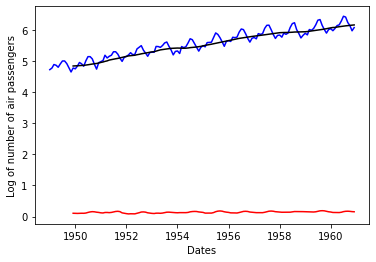

In [46]:
# defining a stationatity test function
def stationarity_test(timeseries):
    movingAverage = timeseries.rolling(window=12).mean()
    movingStd = timeseries.rolling(window=12).std()
    
    # plotting rollin statistics
    data_ = plt.plot(timeseries, label='Original data')
    rolMean_plot = plt.plot(movingAverage,color='black', label='Rolling mean')
    rolStd_plot = plt.plot(movingStd,color='red', label='Rolling standard deviation')
    plt.legend(loc='best')
    plt.title('Rolling statistics: Rolling mean and standard deviation')
    
    # performing adf test
    print('Augmented Dickey Fuller Result')
    adfTest = adfuller(timeseries['passengers'], autolag='AIC')
    adfResult = pd.Series(adfTest[0:4], index=['Test Statistics', 'p-value', 'no of lag used',
                                               'no of observation used']) 
    for key, value in adfTest[4].items():
        adfResult['Critical Value{}'.format(key)] = value
        
    print(adfResult)
    
    

Augmented Dickey Fuller Result
Test Statistics             0.815369
p-value                     0.991880
no of lag used             13.000000
no of observation used    130.000000
Critical Value1%           -3.481682
Critical Value5%           -2.884042
Critical Value10%          -2.578770
dtype: float64


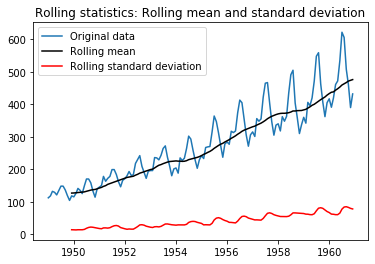

In [47]:
stationarity_test(data)

The adf test also shows that data is not stationary as shown in the plot since p-value > 0.05  (test statiastics > critical value)  --> accept null hypothesis(data not stationary)
Therefore, we must first find a way of making the data stationery